**PySDS Week 2 Lecture 1. V.1 **
Last author: B. Hogan

In [1]:
from IPython import display
%pylab inline

# Week 2. Day 1. Data Structures for Scientific Python 

Today we introduce three data structures that will be used repeatedly in scientific python. 
- Numpy Array
- Series
- DataFrame

The array is built for speed, whereas the series is the standard scientific list. The DataFrame is a (typically two-dimensional) table of values. Each of these data structures has it's own uses. Like lists and dictionaries they are collections of objects. But they have additional features, for example, a ```Series``` has a ```mean()``` method where a ```list``` does not. See below: 

In [14]:
from pandas import Series

s = Series([1,3,4,7])
print(s.mean())

l = []
print(dir(l))
print()
print(dir (s))

3.75
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__fi

We will show these data structures, how to create them, move data around, delete data and some of the uses of these structures practically. 

# Section 1. Numpy Array 

The numpy array is the basis of the series and data frame objects. It is very efficient. Unlike a list, the objects in an array are of the same type. This allows for considerably faster computation. Here it is worth pointing out that much of python is actually a wrapper for ```c``` code. C is a pervasive, extremely efficient language. That said, it is often cumbersome to use and does not provide anywhere near the level of abstraction of python. Numpy uses C more directly than python lists do.  

We tend not to use the numpy array directly although it can be useful for a number of tricks, as we will show later. One in particular is for generating multiple columns of random numbers. However, for the most part we only interface numpy through PANDAS and not directly. 

A numpy array is designed to implement matrix algebra, something useful in a variety of circumstances. For example, we can characterise a **social network** as a matrix and then use that matrix to learn things about the network. 

Before we get there, however, let's introduce the simple unidimensional array, sometimes called a **vector**. 

In [15]:
import numpy as np 

x = [1,2,3]

npx = np.array([1,2,3])

print(x,npx)

print(x[0],npx[0])


[1, 2, 3] [1 2 3]
1 1


The numpy array can be unidimensional (i.e. just like a single list) or multidimentional. When it is unidimensional it is sometimes referred to as a vector. This is not quite appropriate according to the mathematicians, but it seems to be popular in computer languages. 

A two dimensional array is referred to as a matrix. So if we have a vector of friendship nominations that means we have a one dimensional array representing friendships from that person to the other people. 

If we have four friends, Alice, Bob, Charlie and Diane, they each have a vector referring to whether they are friends with each other. Let's keep each one of these in order of A,B,C,D. So for Alice, if she is only friends with Diane, her vector would look like: 
```
Alice = np.array([0,0,0,1])
```
Whereas Diane might consider herseff friends with everyone. So hers looks like: 
```
Diane = np.array([1,1,1,0])
```
Notice that zero at the end? That's because Diane can't be friends with herself. When you stitch these one dimensional arrays together, you can get a matrix representing the network of friendships, like so: 

In [16]:
import numpy as np 

Alice = np.array([0,0,0,1])
Bob = np.array([1,0,0,1])
Charlie = np.array([0,1,0,1])
Diane = np.array([1,1,1,0])

friendshipMatrix = np.array([Alice,Bob,Charlie,Diane])

print(friendshipMatrix)

[[0 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 [1 1 1 0]]


Notice a couple things about the output. First about the structure and second about the semantics. 

1. The structure: 
 - It's not very clear who is who in this matrix. We know that it goes Alice, Bob, Charlie, Diane so we can follow along. But that gets particularly difficult when we have many rows and columns we have to manage. Part of the reason for using PANDAS is that where an array is simplified, a PANDAS DataFrame allows us to have row and column labels, as well as indexing by that label. We will show this in Section 3. 

2. The semantics:
 - Notice that we said this was a network of friendships. Well, aren't friends supposed to be symmetric? Bob said Alice was his friend, but Alice did not say Bob was her friend. Drama! What if we had a way to determine whether a friendship is reciprocated? This is where ```numpy``` shines as a means of doing **linear algebra**. 
 - As we go through this example, it will be clear that not only is matrix algebra useful, but that it can be hard to follow without having labels on the rows and columns. So first let's do it, and then we will move over to the nicer data structures with labels.


## Example: How to determine if a friendship is reciprocated

1. To do this we would first flip the matrix around. Right now we have it so that we have rows of 'from' and columns of 'to'. So it is a row of friendship nominations from Alice to Bob, Charlie and Diane. By **transposing**  we can turn this on its head so that 'to' is in the columns and 'from' in the rows.
 - ```new_mat = old_mat.transpose()```
 - $ \mathbf{A}^T$
2. Then we can multiply each cell by its corresponding cell in the transposed matrix. If the friendship is unreciprocated, then the result will be $1 * 0$ which is $0$. If it is reciprocated, then it will be a $1$. This will be a matrix of reciprocated friendships. 
 - ```recip_mat = old_mat * new_mat```
 - $ \mathbf{A}_r = \mathbf{A} * \mathbf{A}^T $
3. Finally, let's remove the reciprocated friendships from the original matrix. What we have left over are the unreciprocated friendships. 
 - ```unrecip = mat - recip_mat```
 - $ \mathbf{A}_u = \mathbf{A} - \mathbf{A}_r $

See below: 

In [17]:
# Create a matrix from four vectors
Alice = np.array([0,0,0,1])
Bob = np.array([1,0,0,1])
Charlie = np.array([0,1,0,1])
Diane = np.array([1,1,1,0])

friend_mat = np.array([Alice,Bob,Charlie,Diane])
print("The friendship matrix:")
print(friend_mat,'\n')

# Get the transpose of that matrix
t_mat = friend_mat.T

print("The transposed matrix:")
print(t_mat,'\n')

# Get the reciporcated friendships
recip_mat = t_mat * friend_mat 

print("The reciprocated friendships")
print(recip_mat,'\n')

# Get the unreciprocated friendships
unrecip_mat = friend_mat - recip_mat

print("The unreciprocated friendships")
print(unrecip_mat,'\n')

The friendship matrix:
[[0 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 [1 1 1 0]] 

The transposed matrix:
[[0 1 0 1]
 [0 0 1 1]
 [0 0 0 1]
 [1 1 1 0]] 

The reciprocated friendships
[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]] 

The unreciprocated friendships
[[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]] 



# Section 2. The Series

The Series data structure is very much akin to a vector. It is unidimensional and it considers everything in the structure as a common type. If it is all integers, the Series will be of type integer. If it is a mix of integers and strings, it will be of type 'object', which is more generic. 

A series has an index which can be automatically created. The indices do not have to be unique, but if they are not, then the coder runs the risk of accidentally indexing the wrong element. We will show how to keep indices tidy later on. 

Let's import the series below: 

In [21]:
from pandas import Series

# Creates a single element series (not four empty rows)
ser1 = Series(4)

print(ser1)

# Creates a series with four of the same elements:

ser2 = Series([1.0]*4)

print(ser2)

# Creates a series with a range of numbers: 
# Remember with range when you have three arguments it is:
# range(<start>,<exclusive stop>,<step>)

ser3 = Series(range(1,8,2))
print(ser3)

# Create a series with a string. Notice that since it is non-numeric, it's just classed as 'object'

ser4 = Series(["Alice","Bob","Charlie","Diane"],name="test")
display(ser4)

0    4
dtype: int64
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64
0    1
1    3
2    5
3    7
dtype: int64


0      Alice
1        Bob
2    Charlie
3      Diane
Name: test, dtype: object

## Operations on a series. 

We can operate on every element in a series directly. Whereas with a list if we type ```list1 * 2``` the result will be the list, only doubled. But if we do it for a series, we will multiply _every element_ ```* 2```. See below: 

In [22]:
from pandas import Series

def doubleUpDemo(listToDouble):
    '''Prints a list doubled as both list and series
    
    Keyword arguments:
    listToDouble -- Assumes it's a list.
    '''
    print("Here is the original")
    print(listToDouble)
    print() 
    
    print("Here's a list * 2")
    print(listToDouble*2)
    print() 
    
    ser1 = Series(listToDouble)
    print("Here's a series * 2")
    print(ser1 * 2)
    print()
    return 

# First we send a list of integers to the function
doubleUpDemo([1,2,3,4])

# Next we send a list of strings
doubleUpDemo(["a","b","c","d"])

Here is the original
[1, 2, 3, 4]

Here's a list * 2
[1, 2, 3, 4, 1, 2, 3, 4]

Here's a series * 2
0    2
1    4
2    6
3    8
dtype: int64

Here is the original
['a', 'b', 'c', 'd']

Here's a list * 2
['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd']

Here's a series * 2
0    aa
1    bb
2    cc
3    dd
dtype: object



Notice that when we used strings, the cells doubled the string inside the list. This is because the ```*``` operator is **overloaded** which means that it refers to multiple potential operations depending on the context. The ```+``` symbol is also overloaded as we already know. It can mean both plus and concatenate. If we tried that with an operator that is not overloaded, such as exponent, then we would have got an error. See below: 

In [23]:
from pandas import Series

print("Here's a series of numbers to the second power")

ser1 = Series([1,2,3,4])
print(ser1 ** 2)
print()

print("Here's a series of strings to the second power")

ser2 = Series(["a","b","c","d"])
print(ser2 ** 2)
print()

Here's a series of numbers to the second power
0     1
1     4
2     9
3    16
dtype: int64

Here's a series of strings to the second power


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

## Series and indices 

Every series has an index for each of the elements in the series. The index itself is available through ```<seriesName>.index```. The index is mutable, so you can either create new names for your index when you create your series or do it later on. You can also reindex a series, which is important if you're concatenating two series. 

A series is **ordered** so we can index every element by its position in addition to indexing it by the index name. 

In [ ]:
from pandas import Series 

ser1 = Series(["a","b","c","d"], index = ["alpha","bravo","charlie","delta"])
print(ser1,"\n")
print("Here is the first element:",ser1[0],"\n")
print(ser1,"\n")
print("Here is the element from index 'alpha':",ser1["alpha"])

Just because it is ordered and you, in theory, can index it by position, _you really shouldn't_. Just watch what happens when we give the index numerical values in the wrong order. When we try to index element 0 we get 'c' and not 'a' as we got above. Instead, you should always index either by name if you need to access the values in a series, or simply in order.

That being said, positional numbers are still really useful for slicing and will always work as expected. 

In [ ]:
from pandas import Series 

ser1 = Series(["a","b","c","d"], index = ["alpha","bravo","charlie","delta"])

ser1.index = [1,4,0,2]
print(ser1)

print("By position?")
print(ser1[0],"\n")

print("Slicing up to the third element.")
print(ser1[:2],"\n")

print("Slicing from third element onwards.")
print(ser1[2:],"\n")

## Ways to create a series

We already saw how to create a series from a list as well as an index from a list. If you have a dictionary, you can also turn it into a series. It will keep the key as the index and the value as the value in the cell. See below: 

In [ ]:
from pandas import Series

# You can also create a series with an index in one go using a dictionary. 

dict1 = {"alpha":"a","bravo":"b","delta":"d","epsilon":"e"}
ser1 = Series(dict1)

print(ser1)
print()

If your series has a **misalignment** between the length of the collection of values and the length of the index, pandas will try to infer what to do. Typically this involves throwing an error if the index and the series are not of the same length. 

In [ ]:
from pandas import Series

values1 = [1,3,5]
index1 = ["Apples","Oranges","Bananas","kiwis","durian"]

ser1 = Series(values1,index=index1) 
print(ser1)

## Filtering a series

There are many ways to filter a series. Two featured here involve **slicing** and **Boolean logic**.

### Slicing 

Just like how a list can be sliced, we can similarly slice a Series.

In [33]:
from pandas import Series

ser1 = Series(["a","b","c","d"])

ser1.index = [1,4,0,2]
print(ser1,"\n")

print("By position?")
print(ser1[0],"\n")
print(ser1.loc[0],"\n")

print("Slicing up to the third element.")
print(ser1[:2],"\n")

print("Slicing from third element onwards.")
print(ser1[2:],"\n")

1    a
4    b
0    c
2    d
dtype: object 

By position?
c 

c 

Slicing up to the third element.
1    a
4    b
dtype: object 

Slicing from third element onwards.
0    c
2    d
dtype: object 



### Boolean Logic
If you recall, Boolean logic allows you to evaluate the logical truth condition of a statement. So if ```x = 4``` and ```y = 4``` then ```x == y``` will be true. With a series, instead of returning whether _the series_ is true or false, it evaluates each cell and returns a new series of True and False values that satisfy that condition. So if we have a series:
~~~py 
ser1 = [1,2,3,4,5]
~~~
Then asking:
~~~py
ser1 > 3
~~~
will return a series of equal length with cells representing whether the original value was > 3 as True and otherwise as False. See the example below: 

In [34]:
from pandas import Series

ser1 = Series(["a","b","c","d"])
ser2 = Series([1,3,5,7,9,11])

# We can filter a series in lots of different ways. 

# Every time you evaluate a series by boolean logic it returns a series of that length true / false
print(ser1 > "c")
print()

print(ser2 > 5)
print() 

# You can then apply this to your original series to filter out the false entries. 
ser2q = ser2 > 5
print(ser2)
print()
print(ser2q)
print("\nThe new slimmer series\n")
print(ser2[ser2q])
print()

0    False
1    False
2    False
3     True
dtype: bool

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

0     1
1     3
2     5
3     7
4     9
5    11
dtype: int64

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

The new slimmer series

3     7
4     9
5    11
dtype: int64



Slicing and filtering are especially useful if you have some missing data and you want to delete the cases "listwise", meaning exclude a row. So instead of using a boolean, you would use the function:

~~~python 
series.notnull() 
~~~

which will return true for all the non-null values. You can also use the opposite function: 

~~~python 
series.isnull() 
~~~

These will more relevant later this week once we get to merging. When you merge two data sets, you can often have missing data depending on how you merge. 

In [35]:
ser3 = Series([1,4,7,None,8,9])
print(ser3)

print(ser3.isnull())
print()

print(ser3[ser3.notnull()])

0    1.0
1    4.0
2    7.0
3    NaN
4    8.0
5    9.0
dtype: float64
0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

0    1.0
1    4.0
2    7.0
4    8.0
5    9.0
dtype: float64


## Key Series Operations 

There are a number of operations you can do on a series. You can see the lot of them by typing: 
~~~python
dir(Series)
~~~

We are here focusing on a handful of these for data processing: 
- value_counts()
- unique() 
- sort() and reindex() 

### Value Counts

```value_counts()``` returns a new series where the earlier values are now indices and the counts of values are now in the cell. So if you have a Series with the following numbers:

~~~python
ser1 = [1,1,7,7,7,33,1,6,33,7,7] 
~~~

Then you have 3 of the number 1, 5 of the number 7, 2 of the number 33 and one 6. 

To see this summarised, type 

~~~python
print (ser1.value_counts()) 
~~~

As ```value_counts()``` returns the new series, we can print it directly. See below: 

In [36]:
from pandas import Series 

ser1 = Series([1,1,7,7,7,33,1,6,33,7,7])

print(ser1,"\n")
print(ser1.value_counts(),"\n")

print(ser1,"\n")
print(ser1.unique(),"\n")

In [37]:
# Since a string is a list of charcters this is 
#also a quick way to get a count of characters in a string. 

ser2 = Series(list("the quick brown fox jumps over the lazy dog"))
print(ser2,"\n")
print(ser2.value_counts(),"\n")

0     t
1     h
2     e
3      
4     q
5     u
6     i
7     c
8     k
9      
10    b
11    r
12    o
13    w
14    n
15     
16    f
17    o
18    x
19     
20    j
21    u
22    m
23    p
24    s
25     
26    o
27    v
28    e
29    r
30     
31    t
32    h
33    e
34     
35    l
36    a
37    z
38    y
39     
40    d
41    o
42    g
dtype: object 

     8
o    4
e    3
h    2
u    2
r    2
t    2
w    1
g    1
i    1
v    1
m    1
q    1
l    1
f    1
y    1
a    1
d    1
c    1
x    1
n    1
k    1
s    1
j    1
p    1
b    1
z    1
dtype: int64 



So in the previous example, the quick brown fox... was turned into a series that descended in order from the most frequent to the least frequent. 
1. What if we want to have it sorted alphanumerically? 
2. What if we only want counts of valid alphanumeric characters and not spaces? 

For the first one we can use ```sort_index()``` to resort the numbers by index. 

In [40]:
x = ("hello my name is  bernie")
print(x.split(" "))

['hello', 'my', 'name', 'is', '', 'bernie']


In [39]:
?ser1.sort_index()

Signature: ser1.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
Docstring:
Sort Series by index labels.

Returns a new Series sorted by label if `inplace` argument is
``False``, otherwise updates the original series and returns None.

Parameters
----------
axis : int, default 0
    Axis to direct sorting. This can only be 0 for Series.
level : int, optional
    If not None, sort on values in specified index level(s).
ascending : bool, default true
    Sort ascending vs. descending.
inplace : bool, default False
    If True, perform operation in-place.
kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
    Choice of sorting algorithm. See also :func:`numpy.sort` for more
    information.  'mergesort' is the only stable algorithm. For
    DataFrames, this option is only applied when sorting on a single
    column or label.
na_position : {'first', 'last'}, default 'last'
    If 'first' puts NaNs at th

In [41]:
from pandas import Series

ser1 = Series(list("the quick brown fox jumps over the lazy dog"))
print(ser1.value_counts().sort_index(ascending=False))

z    1
y    1
x    1
w    1
v    1
u    2
t    2
s    1
r    2
q    1
p    1
o    4
n    1
m    1
l    1
k    1
j    1
i    1
h    2
g    1
f    1
e    3
d    1
c    1
b    1
a    1
     8
dtype: int64


### Map and Lambda 

What's up with that number 8 above the 'a' character? It refers to the spaces. There are eight spaces in the phrase. Now we have sorted these, so that's good, but how about doing an operation on each of the cells so that we only have a cell for characters? Well, if we want to operate on the string itself it is easy. We already know how to do that, it's

~~~python
"<string>".replace(" ", "")
~~~

Which will replace all the spaces with nothing. But if we want to operate on each cell, we can use map and lambda. Map takes an input and returns an output. The argument in map is what to do with the output. 

Lambda is a way of creating a quick function. 

In [53]:
ser1 = ser1[ ser1.map(lambda x: x.isalpha()) ]
display(ser1.sort_index())

True
True
False
False
True
True
True
False
True
False
False
True
True
True
True
False
False
True
True
False
True
True
True
True
True
False
True
True
False
True
False
True
True
False
False
True
False
True
True
False
False
True
True


0     t
1     h
4     q
5     u
6     i
8     k
11    r
12    o
13    w
14    n
17    o
18    x
20    j
21    u
22    m
23    p
24    s
26    o
27    v
29    r
31    t
32    h
35    l
37    z
38    y
41    o
42    g
dtype: object

Populating the interactive namespace from numpy and matplotlib


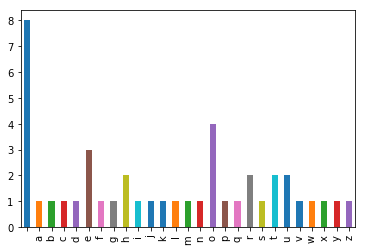

In [84]:
# We can use value counts to plot a summary of data as well. 
%pylab inline

ser1.value_counts().sort_index(ascending=True).plot(kind="bar")

# Section 3. The DataFrame

The DataFrame has a notion of rows and columns. Typically variables would be the columns and cases the rows. This is also related to how data is prepared and calculated. If you call a DataFrame with something in the indexer such as ```df["data"]``` you are accessing the the ```data``` column. Like a series, the DataFrame has a notion of whether it is all of the same type or a mix of different types. 

Each cell in a DataFrame is its own object. It can hold any other object, though some objects are harder for the DataFrame to represent when printing or displaying the DataFrame. You can slice a DataFrame. The result is a 'view' of the DataFrame. That is to say, in many cases, with DataFrames you will not be creating a completely new DataFrame in memory. This is to help with memory management, but it can have some knock on effects. This will become relevant later when we start grouping data. First, let's create a single DataFrame.

## Creating a DataFrame

There are numerous ways to instantiate a DataFrame:
1. Empty
2. With data in a python data structure
    - A series  (which will preserve the index)
    - A list
    - A dictionary (which will make the keys the index) 
3. From tabular data on file.
    - CSV: ```df = DataFrame.from_csv(open("<path_to_file>"))```
    - Reading a table via pandas, e.g., ```pd.read_excel("<path_to_file>")```
    - Reading a table from an ODBC. 
4. From json data 
    - Data in a json can be "normalised" to be a DataFrame. We will see this more tomorrow. 

In [57]:
#############################
#
# Creating an empty DataFrame
#
#############################
import pandas as pd 

df = pd.DataFrame()
display(df)

""


In [62]:
import pandas as pd 
########################################
#
# Creating a dataframe from a dictionary
#
########################################
 
dict_for_df = {
    "Reddit":["reddit.com","a"],
    "Digg":"digg.com",,
    "BBC":"bbc.co.uk",
    "Greenpeace":"greenpeace.org"
}

df1 = pd.DataFrame.from_dict(dict_for_df,orient="index",columns=["urls","letter"])
display(df1)

,urls
Reddit,reddit.com
Digg,digg.com
BBC,bbc.co.uk
Greenpeace,greenpeace.org


In [65]:
import pandas as pd 
########################################
#
# Creating a dataframe from a list
#
########################################

# One dimensional data frame with no indices or column labels 
df1 = pd.DataFrame([1,2,3,4,5])
display(df1)

# Two dimensional data frame with no indices or column labels. 
# Note each 'inner list' in the list is treated as a row. this is why they will come out horizontal.
df2 = pd.DataFrame([[1,2,3,4,5],[2,5,10,17,26]])
display(df2)

# Here we can see a data frame of rows
# Notice how PANDAS handles the missing value
df3 = pd.DataFrame([[1,2],[2,5],[3,10],[None,4],[5,26]])
display(df3)

# Let's replace the index for this data frame
df3.index = ["first","second","third","fourth","fifth"]
display(df3)

# Let's replace the column labels.
df3.columns = ["number","sq_plus_1"]
display(df3)

df3["test"] = 0

display(df3)

,0
0,1
1,2
2,3
3,4
4,5


,0,1,2,3,4
0,1,2,3,4,5
1,2,5,10,17,26


,0,1
0,1.0,2
1,2.0,5
2,3.0,10
3,NaN,4
4,5.0,26


,0,1
first,1.0,2
second,2.0,5
third,3.0,10
fourth,NaN,4
fifth,5.0,26


,number,sq_plus_1
first,1.0,2
second,2.0,5
third,3.0,10
fourth,NaN,4
fifth,5.0,26


,number,sq_plus_1,test
first,1.0,2,0
second,2.0,5,0
third,3.0,10,0
fourth,NaN,4,0
fifth,5.0,26,0


## Adding data to a dataframe as column

In [67]:
import pandas as pd
#
series1 = Series([1,4,9,4,1,6],name="Numbers")

df = pd.DataFrame(series1) 
display(df)

# Notice that this series does not have the indices labelled

series2 = Series(["Alice","Bob","Charlie","Diane","Elanor","Fong"])
df["Names"] = series2
display(df)

,Numbers
0,1
1,4
2,9
3,4
4,1
5,6


,Numbers,Names
0,1,Alice
1,4,Bob
2,9,Charlie
3,4,Diane
4,1,Elanor
5,6,Fong


In [70]:
# This series has indices. 
series1 = Series([1,4,9,4,1,6],name="Numbers")
df = pd.DataFrame(series1) 

series2 = Series({
    1:"Pride",
    0:"Greed",
    3:"Lust",
    4:"Envy",
    5:"Sloth",
    6:"Gluttony",
    7:"Wrath"
})

df["sins"] = series2
display(df)

,Numbers,sins
0,1,Greed
1,4,Pride
2,9,NaN
3,4,Lust
4,1,Envy
5,6,Sloth


In [71]:
# Concatenating the series. It stacks them on top of each other. 
# Notice the index is now repeating.
df = pd.DataFrame(series1) 
display(pd.concat([df,series2],axis=0))

l = [1,2,3]
df["test"] = l 
display(df)
# We can reset the index, but in this case we want to stack 
# horizontally rather than vertically. 
df = pd.DataFrame(series1) 
display(pd.concat([df,series2],axis=1) )

,Numbers,0
0,1.0,NaN
1,4.0,NaN
2,9.0,NaN
3,4.0,NaN
4,1.0,NaN
5,6.0,NaN
1,NaN,Pride
0,NaN,Greed
3,NaN,Lust
4,NaN,Envy


ValueError: Length of values does not match length of index

## Deleting a column from a series

In [68]:
display(df)
display(df.columns)

if "Names" in df.columns: 
    del df["Names"]
    
display(df)

,Numbers,Names
0,1,Alice
1,4,Bob
2,9,Charlie
3,4,Diane
4,1,Elanor
5,6,Fong


Index(['Numbers', 'Names'], dtype='object')

,Numbers
0,1
1,4
2,9
3,4
4,1
5,6


## Adding data to a dataframe as row 

Below are a number of ways to add a dataframe to a row. We first look at append and then concat. We will later look at ```loc``` / ```iloc``` as ways to enter data by hand. 

When we add data together, PANDAS tries to merge based on the column names, but as seen above, it doesn't not try to merge on indices unless specified. 

In [75]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'),index=[3,4])
display(df)
# Appending a DataFrame with columns unspecified
df2 = pd.DataFrame([[5, 6], [7, 8]])
display(df.append(df2))

# Appending a DataFrame with the same columns. 
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=["A","B"])
display(df.append(df2))


,A,B
3,1,2
4,3,4


,A,B,0,1
3,1.0,2.0,NaN,NaN
4,3.0,4.0,NaN,NaN
0,NaN,NaN,5.0,6.0
1,NaN,NaN,7.0,8.0


,A,B
3,1,2
4,3,4
0,5,6
1,7,8


In [76]:
# Concatenating a DataFrame with same columns 
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
display(df + df2)

# Without 'ignore_index=True flag'
display(pd.concat([df,df2]))

display(pd.concat([df,df2],ignore_index=True))

,A,B
0,NaN,NaN
1,NaN,NaN
3,NaN,NaN
4,NaN,NaN


,A,B
3,1,2
4,3,4
0,5,6
1,7,8


,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [77]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))

# Appending a list of data
list1 = [6,8]
display(df.append(list1))

# Appending a list of a list of data
list1 = [[6,8]]
display(df.append(list1))

,A,B,0
0,1.0,2.0,NaN
1,3.0,4.0,NaN
0,NaN,NaN,6.0
1,NaN,NaN,8.0


,A,B,0,1
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
0,NaN,NaN,6.0,8.0


In [79]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))

# Appending a Series of data
series1 = pd.Series([6,8])
display(df.append(series1,ignore_index=True))

# Appending a Series of data
series1 = pd.Series([6,8],index=['A','B'])
display(df.append(series1,ignore_index=True))

# Appending a Series of data
series1 = pd.Series([6,8],index=['B','A'],name="SeriesData")
display(df.append(series1))

,A,B,0,1
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
2,NaN,NaN,6.0,8.0


,A,B
0,1,2
1,3,4
2,6,8


,A,B
0,1,2
1,3,4
SeriesData,8,6


## Indexing / altering an element

Two common ways to locate the contents of a cell are to use ```.loc[]``` and ```iloc[]```. Notice that these are indexers and not methods, which is why they use the square brackets and not the parentheses. 

- ```.loc[]``` locates based on the name of the row. So in some code, you might see the use of loc with a number, but be careful! that number refers to the label of the index, not its sequential index. 
- ```.iloc[]``` locates based on the index of the row sequentially.

The difference between these two can be seen in the code below. 

In [85]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))

# Indexed locate
display( df.iloc[0] )
# Label-based locate
display( df.loc[0] )

df.index = ["col1","col2"]

# Indexed locate
display( df.iloc[0] )
# Label-based locate
try: 
    display( df.loc[0])
except:
    print("Zero is no longer the label for the index.")
    print("The zeroth row is:", df.index[0])
    display( df.loc["col1"])

A    1
B    2
Name: 0, dtype: int64

A    1
B    2
Name: 0, dtype: int64

A    1
B    2
Name: col1, dtype: int64

Zero is no longer the label for the index.
The zeroth row is: col1


A    1
B    2
Name: col1, dtype: int64

### loc and col for indexing by cell. 
Loc / iloc return a series with the DataFrame column names as the indices. 

So if you want the whole row this works fine. Sometimes you just want a cell. In such a case, you have to subsequently ask for the specific column to get the value of the cell and not the whole row. Below are some examples of how to get a row of data and then a single cell. 

In [91]:
df = pd.DataFrame([[1, 2], [3, 4], [5,6]], columns=list('AB'), 
                  index=["first","second","third"])

display(df)
# Returns the row
display(df.loc["first"])
display(df['A'])

# Returns the 'A' indexed value from the row.
display(df.loc["first"]["A"])
display(df.iloc[0,1])

# Same as above but with more sugar
display(df.loc["first","A"])

# You can slice the indices as well
display(df.loc["second":,"A"])

# You can slice columns as well
df["C"] = [7,8,9]
display(df.loc["first","B":])
display(df.iloc[0,1:])


,A,B
first,1,2
second,3,4
third,5,6


A    1
B    2
Name: first, dtype: int64

first     1
second    3
third     5
Name: A, dtype: int64

1

2

1

second    3
third     5
Name: A, dtype: int64

B    2
C    7
Name: first, dtype: int64

B    2
C    7
Name: first, dtype: int64

## Slicing DataFrames with booleans

if you can slice up a DataFrame, you should be able to filter a DataFrame just like we could slice a series. Indeed, this is the case, see below. 

In [92]:
df = pd.DataFrame([[1, 2], [3, 4], [5,6]], columns=list('AB'), 
                  index=["first","second","third"])

display(df)

# Notice that we have queried the DF for a specific series. 
display(df["B"] > 2)

# Down here we filter by the result of that query. 
display( df[  df["B"] > 2 ] )


,A,B
first,1,2
second,3,4
third,5,6


first     False
second     True
third      True
Name: B, dtype: bool

,A,B
second,3,4
third,5,6
